# Problem 1



In [1]:
import numpy as np
import matplotlib.pyplot as plt

Set defautl varibales.

In [2]:
np.random.seed(0)
N, p  = 30, 20
X = np.random.randn(N,p)    # (N,p)
Y = 2*np.random.randint(2,size=N) - 1    # (1,N)

Define logistic function and its gradient.

In [3]:
def f(theta : np.ndarray, i : int) -> np.float64:
    return np.log( 1+np.exp(-Y[i]*(X[i]@theta)) )

def F(theta : np.ndarray) -> np.float64:
    return sum(f(theta,i) for i in range(N))/N

def grad_f(theta : np.ndarray, i : int) -> np.ndarray:
    denominator = 1+np.exp(Y[i]*(X[i]@theta))
    numerator = -Y[i]*X[i]
    return numerator/denominator

Now, we run SGD.

Start from randomly chosen theta with learning rate = 0.01 and iteration 10,000 times.

In each iteration, we save theta and logistic value(=loss)

In [4]:
alpha = 0.01
theta = np.random.randn(p)
thetas = []
values = []

iteration_num = 10000
for _ in range(iteration_num):
    i = np.random.randint(N)
    theta -= alpha*grad_f(theta, i)
    thetas.append(theta.copy())
    values.append(F(theta))

Previously, we store history of two variables, theta and loss.

To visualize the convergence of theta, we compute L2-norm of historical value compared to last one. If our SGD works poorly, we get oscilating graph, otherwise we get rapidly decaying graph. Here, one can apply well-known equivalnce between convergence of sequence and convergence of Cauchy sequence.

Also, we descibe logistic value, wich is just loss.

I named first one as "theta-distance", and second one "value". The results are following:

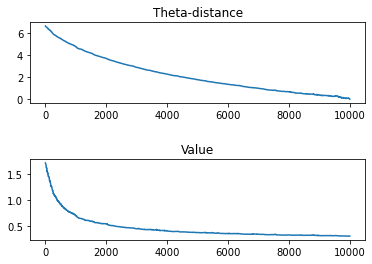

In [5]:
x = np.arange(iteration_num)
y_distance = np.apply_along_axis(np.linalg.norm, axis=1, arr=np.array(thetas)-thetas[-1])
y_val = np.array(values)

plt.subplot(2,1,1)
plt.plot(x, y_distance)
plt.title("Theta-distance")

plt.subplot(2,1,2)
plt.plot(x, y_val)
plt.title("Value")

plt.subplots_adjust(hspace=0.7)
plt.show()


These concludes our logistic regression using SGD works well.